In [3]:
%cd D:\Python Projects\Telecom Churn

D:\Python Projects\Telecom Churn


# Customer Churn Rate


**Wikipedia** defines **_[churn rate](https://en.wikipedia.org/wiki/Churn_rate) (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support._**

The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

---

# Objective

Predict customers who are likely to leave the network so that we can specifically target them and try retaining them.

# Benefit
Retention cost is always less than customer acquisition cost. If we focus and try to retain customers who might leave but have not yet left, we could save a substantial amount of money.

---

### Dataset info
This dataset contains information regarding telecom subscribers. Based on this information, we will build a model to identify customers  who are most likely to leave the network to some other service provider.

The datasets can be found [here](https://www.kaggle.com/blastchar/telco-customer-churn).

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device -protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint #better dictionary printing
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

# Data Overview

Let us get to know our data.

In [5]:
churn = pd.read_csv('churn.csv')

In [6]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
print('Rows: ', churn.shape[0])
print('Columns: ', churn.shape[1])
print('\nFeatures:\n ', churn.columns.tolist())
print('\nUnique Value Count:\n ', churn.nunique())
print('\nMissing Value:\n ', churn.isnull().sum())

Rows:  7043
Columns:  21

Features:
  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique Value Count:
  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Missing Value:
  customerID          0
gender              0
SeniorCitizen  

In [9]:
def values(cols):
    d = {}
    for col in cols:
        x = churn[col].unique()
        d[col] = x
    pprint.pprint(d)

In [10]:
print('Feature Values: \n')
values(churn.columns)

Feature Values: 

{'Churn': array(['No', 'Yes'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'MonthlyCharges': array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'Streami

# Data Manipulation

In [11]:
churn.TotalCharges.min()

' '

TotalCharges column contains spaces which we will replace with nan.

In [12]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ',np.nan)

In [13]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
churn = churn[churn['TotalCharges'].notnull()]

In [15]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

Replacing 'No Internet Service' to 'No' in columns:
- DeviceProtection
- OnlineBackup
- OnlineSecurity
- StreamingMovies
- StreamingTV
- TechSupport

In [16]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [17]:
churn['tenure'].min()

1

In [18]:
churn['tenure'].max()

72

In [19]:
def tenure_slabs(value):
    if value <= 12:
        return 'ten_0-12'
    elif (value > 12) & (value <= 24):
        return 'ten_12-24'
    elif (value > 24) & (value <= 36):
        return 'ten_24-36'
    elif (value > 36) & (value <= 48):
        return 'ten_36-48'
    elif (value > 48) & (value <= 60):
        return 'ten_48-60'
    elif (value > 60) & (value <= 72):
        return 'ten_60-72'

In [20]:
churn['tenure_duration'] = churn['tenure'].apply(tenure_slabs) #to categorical column

# EDA

In [21]:
def make_df(data, col):
    df = pd.DataFrame(data[col].value_counts(normalize = True)*100)
    df = df.reset_index()
    return df

In [22]:
gen = make_df(churn, 'gender')
gen.head()

,index,gender
0,Male,50.469283
1,Female,49.530717


In [23]:
px.bar(gen, x = 'index', y = 'gender', title = 'Gender Distribution: Overall data')

We have almost equal number of male and females in the dataset.

In [24]:
sen = make_df(churn, 'SeniorCitizen')
sen.head()

,index,SeniorCitizen
0,No,83.759954
1,Yes,16.240046


In [25]:
px.bar(sen, x = 'index', y = 'SeniorCitizen', title = 'Senior Citizen Distribution: Overall data')

~16% of the users are senior citizens.

In [26]:
labels = churn['Churn'].value_counts().keys().tolist()
vals = churn['Churn'].value_counts().values.tolist()

fig = go.Figure(data = go.Pie(labels = labels, values = vals))
fig.update_traces(hoverinfo = 'label+value', marker = dict(colors = ['rgb(124,185,232)', 'gold']), hole = .5)
fig.update(layout_title_text = 'Customer Churn Data: Overall data', layout_showlegend = True)
fig.show()

## Deep Dive

Let us now deep dive by separating the dataset based on customers who have left the telecom network and those who have stayed with the network.

In [27]:
churn.shape

(7032, 22)

In [28]:
y_churn = churn[churn['Churn'] == 'Yes'] #customers who have left the network
n_churn = churn[churn['Churn'] == 'No'] #customers who have stayed with the network

In [29]:
print('Number of people who left the telecom:', y_churn.shape[0])
print('Number of people who did not left the telecom:', n_churn.shape[0])

Number of people who left the telecom: 1869
Number of people who did not left the telecom: 5163


In [30]:
def plot_pie(labels, values):
    fig = go.Figure(data = go.Pie(labels = labels, values = values))
    fig.update_traces(hoverinfo='label+value', marker = dict(colors = ['royal blue', 'gold']), hole = .5)
    fig.show()
    
def label(col, churn):
    if churn == 1:
        x = y_churn[col].value_counts().keys().tolist()
        return x
    else:
        x = n_churn[col].value_counts().keys().tolist()
        return x

def values(col, churn):
    if churn == 1:
        x = y_churn[col].value_counts().values.tolist()
        return x
    else: 
        x = n_churn[col].value_counts().values.tolist()
        return x

In [31]:
from plotly.subplots import make_subplots

In [32]:
def make_pies(column, title):
    specs = [[{'type':'domain'}, {'type':'domain'}]]
    colors = ['rgb(124,185,232)','rgb(255,213,0)','rgb(25,77,0)','rgb(255,126,0)','rgb(153,255,102)']
    fig = make_subplots(rows = 1, cols = 2, specs = specs)
    fig.add_trace(go.Pie(labels = label(column, 1), values = values(column, 1), name = 'Churn', marker_colors = colors), 1,1)
    fig.add_trace(go.Pie(labels = label(column, 0), values = values(column, 0), name = 'Non-churn', marker_colors = colors), 1,2)
    fig.update_traces(hoverinfo = 'label+value', hole = 0.6)
    fig.update(layout_title_text = title +': Churn Vs. Non-churn customers')
    fig.update_layout(annotations = [dict(text = 'Churn',x=0.18, y=0.5, font_size=20, showarrow=False),
                                    dict(text = 'Non-churn',x=0.85, y=0.5, font_size=20, showarrow=False)])
    fig.show()

In [33]:
make_pies('gender', 'Gender')

In [34]:
make_pies('SeniorCitizen', 'Senior Citizen')

Let's plot people with/without internet service.

In [35]:
make_pies('DeviceProtection', 'Device Protection')

In [36]:
make_pies('OnlineBackup', 'Online Backup')

In [37]:
make_pies('OnlineSecurity', 'Online Security')

In [38]:
make_pies('StreamingMovies', 'Streaming Movies')

In [39]:
make_pies('StreamingTV','Streaming TV')

In [40]:
make_pies('TechSupport', 'Tech Support')

In [41]:
make_pies('Contract','Contract')

In [42]:
make_pies('SeniorCitizen', 'Senior Citizen')

In [43]:
make_pies('Partner','Partner')

In [44]:
make_pies('Dependents', 'Dependents')

In [45]:
make_pies('PhoneService', 'Phone Service')

In [46]:
make_pies('PaperlessBilling', 'Paperless Billing')

In [47]:
make_pies('PaymentMethod', 'Payment Method')

In [48]:
def make_hist(column, title):
    #fig = make_subplots(rows = 1, cols = 2)
    fig = go.Figure()
    fig.add_trace(go.Histogram(x = n_churn[column], name = 'Non-churn'))
    fig.add_trace(go.Histogram(x = y_churn[column], name = 'Churn'))
    #fig.append_trace(h1, 1,1)
    #fig.append_trace(h2, 1,2)
    fig.update_layout(title_text = title+': Churn Vs. Non-churn customers', 
                      xaxis_title_text = 'Value', yaxis_title_text = 'Count',
                     bargap = 0.2,
                     bargroupgap = 0.1
                     )
    fig.show()

In [49]:
make_hist('TotalCharges', 'Total Charge')

In [50]:
make_hist('tenure_duration', 'Tenure Duration')

In [51]:
avg_charges = churn.groupby('tenure_duration').mean().reset_index()

## change

In [52]:
fig = px.bar(avg_charges, x = 'tenure_duration', y = 'MonthlyCharges')
fig.show()

In [53]:
churn.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_duration']

# Preprocessing

In [54]:
churn.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_duration        6
dtype: int64

In [55]:
category_cols = []
for col in churn.columns.tolist():
    if (churn[col].nunique() <= 6):
        category_cols.append(col)
print(category_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_duration']


We will now use LabelEncoder to encode our data in numeric form which is necessary for ML models.

In [56]:
from sklearn import preprocessing

churn2 = churn.copy()
le = preprocessing.LabelEncoder()
churn2[category_cols] = churn2[category_cols].apply(le.fit_transform)
churn2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,3
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0


We will scale numeric value columns.

In [57]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_values = scaler.fit_transform(churn2[numeric_cols])
scaled_values = pd.DataFrame(scaled_values, columns = numeric_cols)
scaled_values.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [59]:
scaled_values.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [60]:
churn2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_duration     0
dtype: int64

In [61]:
churn2 = churn2.drop(columns = numeric_cols, axis = 1)
churn2 = churn2.merge(scaled_values, how = 'left', left_index = True, right_index = True)
churn2.head()
churn2 = churn2.dropna()

In [62]:
correlation = churn2.corr()
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_duration,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.002531,-0.001247,0.010768,-0.008547,-0.006775,-0.002264,-0.014628,-0.010665,0.001984,...,-0.005311,-0.008617,0.000383,-0.012317,0.016776,-0.008795,0.006507,0.018568,0.006789,0.021080
SeniorCitizen,-0.002531,1.000000,0.016793,-0.210423,0.007959,0.145766,-0.032387,-0.127434,-0.012794,-0.020293,...,0.032087,0.047902,-0.141442,0.156289,-0.039028,0.149517,0.016954,-0.004482,-0.001729,-0.005051
Partner,-0.001247,0.016793,1.000000,0.451744,0.018593,0.142197,0.000978,0.150638,0.153356,0.165936,...,0.137227,0.129817,0.294682,-0.013946,-0.157500,-0.150152,0.370993,0.037100,-0.003828,0.026933
Dependents,0.010768,-0.210423,0.451744,1.000000,-0.000627,-0.025564,0.044691,0.150895,0.090317,0.079513,...,0.046151,0.021564,0.240857,-0.110394,-0.042629,-0.162802,0.157899,0.021078,-0.000263,0.011245
PhoneService,-0.008547,0.007959,0.018593,-0.000627,1.000000,-0.020568,0.386891,-0.013976,0.024355,0.004779,...,0.056426,0.043233,0.002839,0.016218,-0.005025,0.011129,0.006401,-0.006858,0.023473,0.004607
MultipleLines,-0.006775,0.145766,0.142197,-0.025564,-0.020568,1.000000,-0.108592,0.007278,0.117134,0.122448,...,0.175666,0.182019,0.111675,0.165336,-0.177896,0.037170,0.336193,0.014854,0.017354,0.027035
InternetService,-0.002264,-0.032387,0.000978,0.044691,0.386891,-0.108592,1.000000,-0.027732,0.036689,0.045855,...,0.108505,0.098377,0.099392,-0.138562,0.085364,-0.047394,-0.030128,-0.011765,-0.004434,-0.016558
OnlineSecurity,-0.014628,-0.127434,0.150638,0.150895,-0.013976,0.007278,-0.027732,1.000000,0.185425,0.175357,...,0.044027,0.056120,0.374131,-0.158273,-0.096709,-0.289379,0.316547,0.033771,-0.005640,0.019069
OnlineBackup,-0.010665,-0.012794,0.153356,0.090317,0.024355,0.117134,0.036689,0.185425,1.000000,0.186931,...,0.146589,0.136632,0.280717,-0.011958,-0.125604,-0.195639,0.366590,0.021768,0.011226,0.026559
DeviceProtection,0.001984,-0.020293,0.165936,0.079513,0.004779,0.122448,0.045855,0.175357,0.186931,1.000000,...,0.274955,0.288411,0.349668,-0.037434,-0.136512,-0.177826,0.361950,0.037020,0.006850,0.033363


In [63]:
corr_col = correlation.columns.tolist()


In [64]:
fig = go.Figure(data = go.Heatmap(z = correlation,
                                 x = corr_col,
                                 y = corr_col)
               )

fig.update_layout(title = 'Correlation Matrix', width = 800, height = 800)
fig.update_xaxes(tickangle = 90)
fig.show()

# Modelling

Now we have converted all the columns in numeric form and can start modelling.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer

In [66]:
t_cols = []
for i in churn2.columns:
    if (i != 'Churn') & (i != 'customerID'):
        t_cols.append(i)

In [67]:
train_data = churn2[t_cols]
target = churn2['Churn']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size = 0.3, random_state = 1)

lr = LogisticRegression(solver = 'liblinear')

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions_lr = lr.predict(x_test)

In [70]:
probs = lr.predict_proba(x_test)

In [71]:
acc_lr = lr.score(x_test, y_test)
print('The accuracy of this model is:', round(acc_lr, 3)*100, '%')
print('\n')

print('Classification Report:\n')
clf_report_lr = classification_report(y_test, predictions_lr)
print(clf_report_lr)
print('\n')

con_matrix = confusion_matrix(y_test, predictions_lr)
print('Confusion Matrix:\n')
print(con_matrix)
print('\n')

roc_auc = roc_auc_score(y_test, predictions_lr)
print('Area under the curve:',roc_auc)

The accuracy of this model is: 79.9 %


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1546
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2107
   macro avg       0.75      0.70      0.72      2107
weighted avg       0.79      0.80      0.79      2107



Confusion Matrix:

[[1402  144]
 [ 279  282]]


Area under the curve: 0.7047651002068474


## Visualizing Model Performance 

In [72]:
#plotting confusion matrix
fig = go.Figure(data = go.Heatmap(z = con_matrix,
                                 x = ['Not Churn', 'Churn'],
                                 y = ['Not Churn', 'Churn'],
                                 colorscale = 'Cividis',
                                 showscale = False))
fig.update_layout(title = 'Confusion Matrix')
fig.show()

In [73]:
import scikitplot as skplt

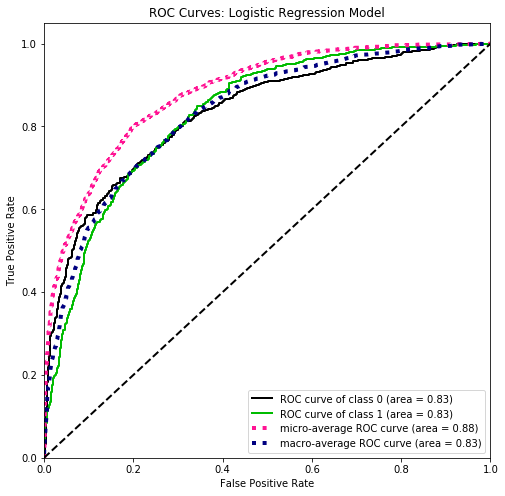

In [74]:
#plotting ROC curve
skplt.metrics.plot_roc(y_test, probs, figsize = (8,8), title = 'ROC Curves: Logistic Regression Model')

# Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree = DecisionTreeClassifier()

In [77]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
predict_tree = tree.predict(x_test)

In [79]:
def model_metrics(algo, x, y, preds):
    score = algo.score(x,y)
    print('The accuracy of this model is:', round(score, 3)*100, '%')
    print('\n')
    
    print('Classification Report:\n')
    clf_report = classification_report(y, preds)
    print(clf_report_lr)
    print('\n')
    
    con_matrix = confusion_matrix(y, preds)
    print('Confusion Matrix:\n')
    print(con_matrix)
    print('\n')
    
    roc_auc = roc_auc_score(y, preds)
    print('Area under the curve:',roc_auc)
    
    return con_matrix

In [80]:
c = model_metrics(tree, x_test, y_test, predict_tree )

The accuracy of this model is: 70.89999999999999 %


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1546
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2107
   macro avg       0.75      0.70      0.72      2107
weighted avg       0.79      0.80      0.79      2107



Confusion Matrix:

[[1249  297]
 [ 317  244]]


Area under the curve: 0.6214144719395462


In [81]:
def plot_confusion(con_mat, model_name):
    fig = go.Figure(data = go.Heatmap(z = con_mat,
                                      x = ['Not Churn','Churn'],
                                      y = ['Not Churn','Churn'],
                                      colorscale = 'Cividis',
                                      showscale = False
                                     ))
    fig.update_layout(title = 'Confusion Matrix: '+ model_name)
    fig.show()

In [82]:
plot_confusion(c, 'Decision Tree')

# Recursive Feature Elimination

In [83]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(solver = 'liblinear')
rfe = RFE(lr,10)
rfe = rfe.fit(x_train, y_train.values.ravel())

rfe.support_
rfe.ranking_


array([11,  1, 10,  1,  8,  1,  7,  1,  1,  6,  1,  2,  1,  1,  1,  9,  1,
        3,  5,  4])

In [84]:
churn_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in churn2.columns if i not in churn2[['customerID', 'Churn']]],
                       "ranking" : rfe.ranking_,
                      })
rfe_cols = churn_rfe[churn_rfe["rfe_support"] == True]["columns"].tolist()

In [86]:
rfe_cols

['SeniorCitizen',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'tenure_duration']

### New train and test data based on RFE

In [87]:
rfe_xtrain = x_train[rfe_cols]
rfe_ytrain = y_train
rfe_xtest = x_test[rfe_cols]
rfe_ytest = y_test

In [88]:
lr.fit(rfe_xtrain, rfe_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
predictions_rfe_lr = lr.predict(rfe_xtest)
probs_rfe = rfe.predict_proba(x_test)

In [90]:
print(rfe_xtest.shape)
print(rfe_ytest.shape)
#acc_rfe_lr = lr.score(rfe_xtest, rfe_ytest)
#print('Model Accuracy is:', acc_rfe_lr*100, '%')

(2107, 10)
(2107,)


In [91]:
predictions_rfe_lr

array([0, 0, 0, ..., 1, 0, 0])

In [92]:
acc_lr_rfe = lr.score(rfe_xtest, rfe_ytest)
print('The accuracy of this model is:', round(acc_lr_rfe, 3)*100, '%')

The accuracy of this model is: 79.7 %


In [93]:
c_rfe = model_metrics(rfe, x_test, y_test, predictions_rfe_lr)

The accuracy of this model is: 79.7 %


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1546
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2107
   macro avg       0.75      0.70      0.72      2107
weighted avg       0.79      0.80      0.79      2107



Confusion Matrix:

[[1397  149]
 [ 278  283]]


Area under the curve: 0.7040392894779928


In [94]:
plot_confusion(c_rfe, 'Recursive Feature Elimination')

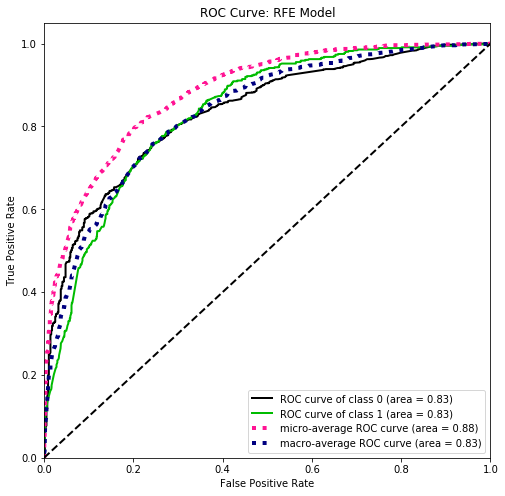

In [95]:
skplt.metrics.plot_roc(y_test, probs_rfe, figsize = (8,8), title = 'ROC Curve: RFE Model')

# Conclusion

We will use the first model based on logistic regression as that gives us the highest accuracy of 79.9%.